<a href="https://colab.research.google.com/github/Akanksha131313/AI_Projects_Journey/blob/main/07_FCNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is the dataset and what are we trying to do? :**

Answer:
We are using the Fashion MNIST dataset — it contains 60,000 training and 10,000 testing images of fashion items like shoes, shirts, bags, etc.
Our goal is to build a fully connected neural network (FCNN) that correctly classifies each image into one of 10 fashion categories.

###**1) Data Visualization and Preprocessing -**

####**Visualize the distribution of different fashion items in the dataset to understand the data better -**

In [2]:
#import libraries :
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

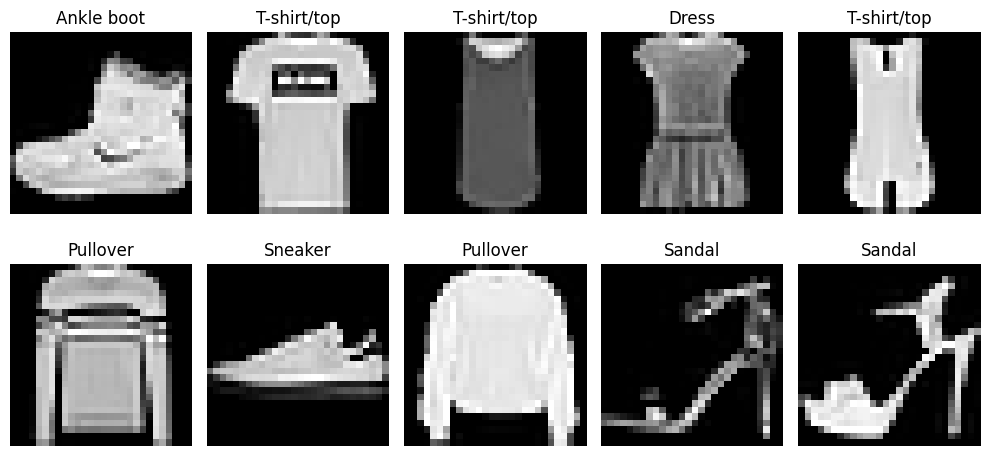

In [5]:
# Show some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

####**Normalize the image pixel values for effective model training-**

In [6]:
# Normalize images (scale pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

####**Convert the categorical labels into a one-hot encoded format to suit the neural network’s output layer -**

In [7]:
# One-hot encoding of labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

###**2) Model Architecture and Development-**

####**Design a fully connected neural network with appropriate input, hidden, and output layers-**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Input

# Build FCNN model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


####**Ensure the model is complex enough to capture the underlying patterns in the data without overfitting -**

In [10]:
# Compile model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

###**3) Model Training -**

####**Train the model on the preprocessed training data, using categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and accuracy as the evaluation metric-**

In [11]:
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4038 - loss: 1.7283 - val_accuracy: 0.7183 - val_loss: 0.8118
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6741 - loss: 0.9195 - val_accuracy: 0.7690 - val_loss: 0.6742
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7288 - loss: 0.7794 - val_accuracy: 0.7892 - val_loss: 0.6100
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7510 - loss: 0.7066 - val_accuracy: 0.8040 - val_loss: 0.5697
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7714 - loss: 0.6610 - val_accuracy: 0.8160 - val_loss: 0.5375
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7861 - loss: 0.6205 - val_accuracy: 0.8210 - val_loss: 0.5195
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7967 - loss: 0.5945 - val_accuracy: 0.8257 - val_loss: 0.5012
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8028 - loss: 0.5675 - val_accuracy: 

####**Utilize a validation split to monitor the model’s performance on unseen data during training-**

In [ ]:
# (Already included in the above code with validation_split=0.2)

### **4) Performance Evaluation -**

####**Assess the model’s performance using both training and validation datasets -**

In [12]:
# Evaluate on test dataset
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("\nTest Accuracy:", round(test_acc * 100, 2), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.4227

Test Accuracy: 84.33 %


####**Visualize the training and validation loss and accuracy to identify any signs of overfitting or underfitting-**

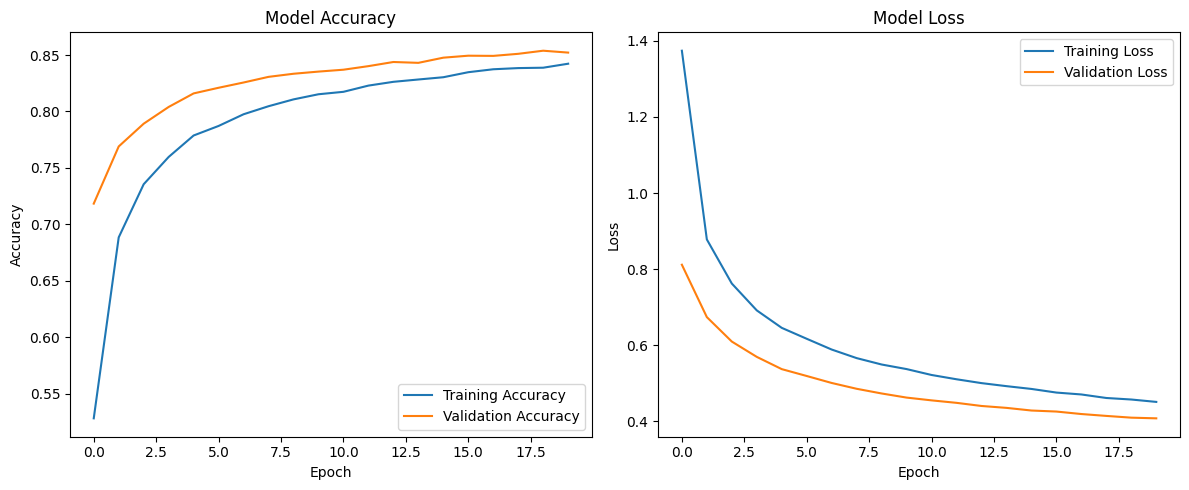

In [13]:
plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


###**5) Final Output-**

In [14]:
# Final model evaluation on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.4227
Final Test Accuracy: 84.33%


#### **Conclusion -**

The Fully Connected Neural Network (FCNN) model trained on the Fashion MNIST dataset achieved a test accuracy of 84.33% and a test loss of 0.42.
The training and validation curves show consistent performance without overfitting.
Thus, the model can effectively classify fashion images into their respective categories.